In [2]:
!pip install pandas
import pandas as pd

In [4]:
fct_invoice_path = '/Users/joshua/Documents/mod6/fct_invoice.csv'
dim_customer_path = '/Users/joshua/Documents/mod6/dim_customer.json'

fct_invoice = pd.read_csv(fct_invoice_path)
dim_customer = pd.read_json(dim_customer_path)

In [6]:
#How many unique customers are in the dataset?
unique_customer_ids_count = fct_invoice['customer_id'].nunique()
unique_customer_ids_count

5191

In [8]:
#What are the different categories of products available? How many unique categories are there?
unique_categories = fct_invoice['category'].unique()
num_unique_categories = fct_invoice['category'].nunique()
print(unique_categories)
print(num_unique_categories)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [10]:
#Which payment method is the most popular? How many times was it used?
payment_method_counts = fct_invoice['payment_method'].value_counts()
most_popular_pay_method = payment_method_counts.idxmax()
most_popular_pay_method_count = payment_method_counts.max()
print(payment_method_counts)
print(most_popular_pay_method)
print(most_popular_pay_method_count)

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64
Cash
44447


In [12]:
#What are the three most popular categories, by total sales?
fct_invoice['total_sales'] = fct_invoice['quantity'] * fct_invoice['price']
sales_by_cat = fct_invoice.groupby('category')['total_sales'].sum()
sales_by_cat = sales_by_cat.sort_values(ascending=False)
print(sales_by_cat.head(3))


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


In [14]:
#What are the total sales attributed to customers over the age of 45?
mergedtables = pd.merge(fct_invoice, dim_customer, left_on = 'customer_id', right_on = 'id')
customers_over_fortyfive = mergedtables[mergedtables['age'] > 45]
customers_over_fortyfive.loc[:,'total_sales'] = customers_over_fortyfive['quantity'] * customers_over_fortyfive['price']
total_sales_over_fortyfive = customers_over_fortyfive['total_sales'].sum()
print(total_sales_over_fortyfive)

82039768.15


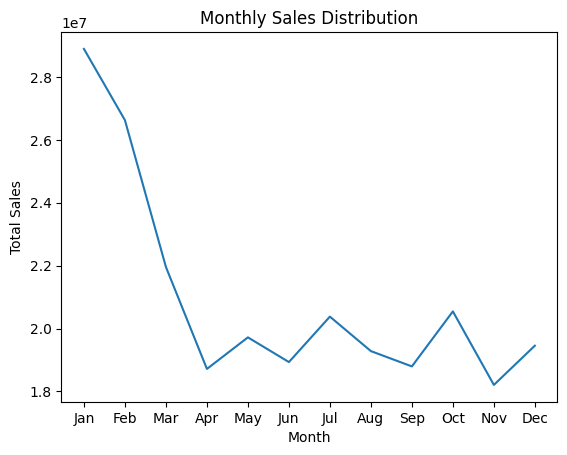

In [16]:
#How is data distributed across different invoice dates? Are there any seasonal trends or pattens?
import matplotlib.pyplot as plt

fct_invoice['invoice_date'] = pd.to_datetime(fct_invoice['invoice_date'],format = '%d/%m/%Y')
monthly_sales = fct_invoice.groupby(fct_invoice['invoice_date'].dt.month).sum(numeric_only=True)

y = monthly_sales['total_sales']
x = monthly_sales.index

plt.plot(monthly_sales.index, monthly_sales['total_sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution')
plt.xticks(range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.show()


In [20]:
#Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade, age range
def categorize_age(age):
    if age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    elif age < 80:
        return '70-79'
    elif age < 90:
        return '80-89'

dim_customer['age_range'] = dim_customer['age'].apply(categorize_age)

merged_data = pd.merge(fct_invoice, dim_customer, left_on='customer_id', right_on='id')
merged_data['total_sales'] = merged_data['quantity'] * merged_data['price']
pivot_table = pd.pivot_table(merged_data, values='total_sales', index='category', columns='age_range', aggfunc='sum', fill_value=0)
print(pivot_table)

age_range             10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_range              50-59        60-69       70-79       80-89  
category                                                           
Books               74962.20     80476.80    54827.85    26664.00  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          587780.9